# Network analysis of Jaz musicians network


This is the collaboration network between Jazz musicians. Each node is a Jazz musician and an edge denotes that two musicians have played together in a band. The data was collected in 2003.


In [1]:
%matplotlib inline

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Code:	JZ

Category:  HumanSocial

Date of origin:	2003

Data source:	http://deim.urv.cat/~alexandre.arenas/data/welcome.htm

Vertex type:	Musician

Edge type:	Collaboration

Format	Undirected: Edges are undirected Undirected

Edge weights:	Unweighted: Simple edges Unweighted

Metadata	Incomplete:   not all edges or nodes from the original dataset are included
Incomplete

Size:	198 vertices (musicians)

Volume:	2,742 edges (collaborations)

Average degree:	27.697 edges / vertex

Fill:	0.14059 edges / vertex2

Maximum degree:	100 edges

Size of LCC	198 vertices: (network is connected)

Wedge count:	103,212

Claw count:	1,583,352

Triangle count:	17,899

Square count:	406,441

4-tour count:	3,669,860

Power law exponent (estimated) with dmin:	5.2710 (dmin = 39)

Gini coefficient:	34.6%

Relative edge distribution entropy:	96.2%

Assortativity:	0.020237

Clustering coefficient:	61.0%

Diameter:	6 edges

90-percentile effective diameter:	2.79 edges

Mean shortest path length:	2.21 edges

Spectral norm:	40.027

Algebraic connectivity:	0.57199

## Columns

First column: ID of from node 

Second column: ID of to node

In [2]:
df = pd.read_csv("data", sep=",", names=["cOne","cTwo"])

Graph input


In [3]:
G = nx.from_pandas_dataframe(df, "cOne", 'cTwo', True)

In [4]:
random_G = nx.gnm_random_graph(198, 2742)

## 0. Draw the newtork

Musicians network


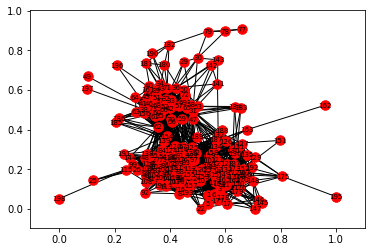

In [5]:
print("Musicians network")
nx.draw_networkx(G, node_size=90, font_size=7)

Random network


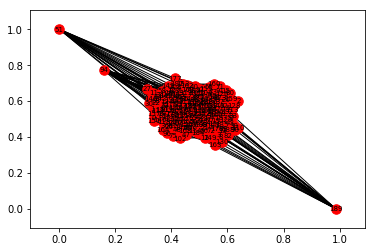

In [38]:
print("Random network")
nx.draw_networkx(random_G, node_size=90, font_size=7)

## 1. The number of nodes and edges:

In [7]:
print("Number of nodes in jazz musicians dataset:", len(G.nodes()))

Number of nodes in jazz musicians dataset: 198


In [8]:
print("Number of edges in jazz musicians dataset:", len(G.edges()))

Number of edges in jazz musicians dataset: 2742


In [9]:
print("Number of nodes in random dataset:", len(random_G.nodes()))

Number of nodes in random dataset: 198


In [10]:
print("Number of edges in random dataset:", len(random_G.edges()))

Number of edges in random dataset: 2742


## 2. Draw the histogram of degrees. Compare the distribution with the distribution for a random graph having the same average degree. Discuss the results.

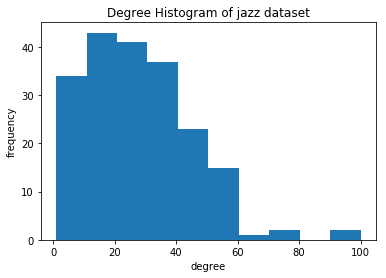

In [13]:
deg_seq = [G.degree(x) for x in nx.nodes(G)]
plt.hist(deg_seq)
plt.title('Degree Histogram of jazz dataset')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

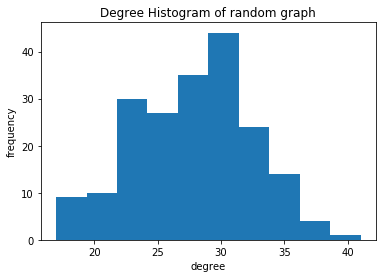

In [14]:
deg_seq_random = [random_G.degree(x) for x in nx.nodes(random_G)]
plt.hist(deg_seq_random)
plt.title('Degree Histogram of random graph')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

In [18]:
average_degree = float(sum(deg_seq))/float(len(deg_seq))
average_degree_random = float(sum(deg_seq_random))/float(len(deg_seq_random))

print("Average degree of our dataset = ",average_degree)
print("Average degree of random dataset = ",average_degree_random)

Average degree of our dataset =  27.696969696969695
Average degree of random dataset = 27.696969696969695


### Discuss the results

For real networks we expect to have hubs: a few extremely well-connected nodes,
pointing to many links. For our dataset we can see that, we have some few nodes having degree more than 60, almost more than two times of the average degree albeit in the random dataset we don't have these well connected nodes as expected.

## 3. Draw the histogram of clustering coefficient, and the average clustering coefficient. Compare it with the one of a random graph and discuss the results.

### 3.1 Clustering coefficient

In [24]:
clustering = nx.algorithms.cluster.clustering(G)

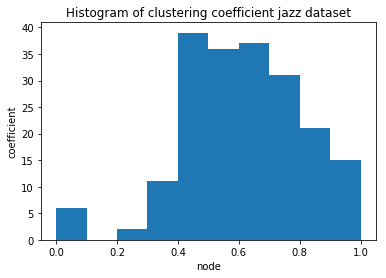

In [26]:
clustering_seq = [nx.clustering(G)[y] for y in nx.nodes(G)]
plt.hist(clustering_seq)
plt.title('Histogram of clustering coefficient jazz dataset')
plt.xlabel('node')
plt.ylabel('coefficient')
plt.show()

In [38]:
clustering_random = nx.algorithms.cluster.clustering(random_G)

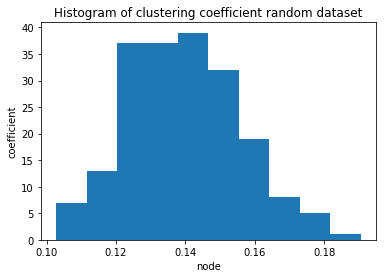

In [27]:
clustering_seq_random = [nx.clustering(random_G)[y] for y in nx.nodes(random_G)]
plt.hist(clustering_seq_random)
plt.title('Histogram of clustering coefficient random dataset')
plt.xlabel('node')
plt.ylabel('coefficient')
plt.show()

### Discuss the results

If we look to the graph of our dataset, we can see some nodes connected to only one node. And the nodes who are connected to isolated(only connected to few nodes) nodes are connected to other nodes. Which means some of the clustering coefficient will be zero because. And we can see that, in our dataset we have some nodes having one as a clustering coefficient, which means we have a complete subgraphs.

Random network: Clustering coefficient is between 0.1 and 0.2. Which means there are no complete subgraphs nor isolated nodes.

### 3.2 Average clustering coefficient

In [40]:
clustering_avg = nx.algorithms.cluster.average_clustering(G)

In [41]:
random_clustering_avg = nx.algorithms.cluster.average_clustering(random_G)

In [65]:
print ("Average clustering coefficient for jazz dataset =",clustering_avg)
print ("Average clustering coefficient for random dataset =",random_clustering_avg)

Average clustering coefficient for jazz dataset 0.6174507021536301
Average clustering coefficient for random dataset 0.14209254918939837


In [21]:
print("Expected average coeefficient = ",average_degree_random/len(random_G.nodes()))

Expected average coeefficient 0.13988368533823078


### Discuss the results

Our dataset has almost 0.61 average clustering coefficient, from this point we can say that this musicians collaborators also collaborate between themselves which is a fact for social networks. If we compare clustering coefficients between our dataset and the random network, we can say that this huge difference is expected because random networks are not socials dataset, and are dataset is social one. 

As expected for random network, expected average coefficient is close to real average clustering coefficient for the random dataset and it is lower than the real networks clustering coefficient.

## 4. Draw the histogram of distances in the graphs, the diameter and the average distance. Compare with random graphs and discuss the results.

### 4.1 Diameter of the graph

In [28]:
diameter = nx.algorithms.distance_measures.diameter(G)

In [29]:
random_diameter = nx.algorithms.distance_measures.diameter(random_G)

In [33]:
print("Diameter in jazz dataset = ", diameter)

Diameter in jazz dataset =  6


In [34]:
print("Diameter in random dataset = ", random_diameter)

Diameter in random dataset =  3


### Discuss the results

Diameter of a graph dmax: the maximum distance between any pair of nodes in the graph.

Our dataset has 6 as a diameter, random network has 3. We expect to have low diameter in real social networks because there are not many links separating any two people in the world. Also, the number of degree is equal less then 6 as expected from the six degrees of separation principle.

The reason behind of this is that we have hubs in the real dataset and we are calculating the maximum distance between nodes. So, for the isolated nodes, first we need to reach to hubs and then to the other node. This is why it makes sense to have a higher diameter in the real dataset.

### 4.2 Average distance

In [39]:
print("Average distance in jazz dataset: ", nx.average_shortest_path_length(G))

Average distance in jazz dataset:  2.2350407629595446


In [40]:
print("Average distance in random dataset: ", nx.average_shortest_path_length(random_G))

Average distance in random dataset:  1.875660154847972


### Discuss the results

They have the same number of nodes and edges, but the average distance in jazz dataset is slightly higher than the random network. This is also expected because, we have some isolated nodes(connecting only to a few nodes)in the real dataset and they are connected to nodes. So, to reach to the other nodes they are using hubs and this makes the distance a little bit more than the random one(because in the random dataset there are no hubs nor isolated nodes)

### 4.3 Histogram of distances

In [189]:
def getShortestDegree(G):
    shortest_degree = {}
    visited = []
    path = nx.all_pairs_shortest_path_length(G)
    for i in path:
        for key, value in path.get(i).items():
            key_value = str(key) + str(value)
            value_key = str(value) + str(key)
            if not(value_key in visited):
                #if not(value_key in visited):
                if not value == 0:
                    if value in shortest_degree:
                        shortest_degree[value]+= 1
                    else:
                        shortest_degree[value] = 1
            
            value_key = str(value) + str(key)
            visited.append(value_key)
            value_key = str(key) + str(value)
            visited.append(value_key)
        
    return shortest_degree

In [190]:
shortest_degree = getShortestDegree(G)
random_shortest_degree = getShortestDegree(random_G)

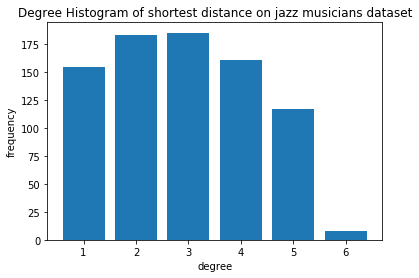

In [191]:
plt.bar(list(shortest_degree.keys()),shortest_degree.values())
plt.title('Degree Histogram of shortest distance on jazz musicians dataset')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

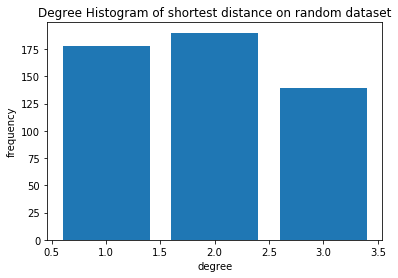

In [102]:
plt.bar(list(random_shortest_degree.keys()),random_shortest_degree.values())
plt.title('Degree Histogram of shortest distance on random dataset')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

### Discuss the results

We once saw that diameter and the average distance in jazz dataset is higher than the random set.

# Extras

## 5. Detect the communities in the graph, and discuss the results.

In [129]:
# if you want this to work on your computer 
# pip install python-louvain
# for the package

# complexity here is O(L)
import community
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

def computeCommunity(G):
    partition = community.best_partition(G)  # compute communities

    pos = nx.spring_layout(G)  # compute graph layout
    plt.figure(figsize=(4, 4))  # image is 4 x 4 inches
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)

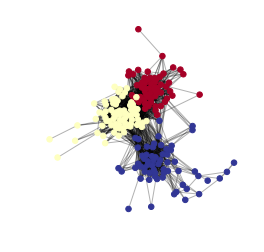

In [130]:
computeCommunity(G)

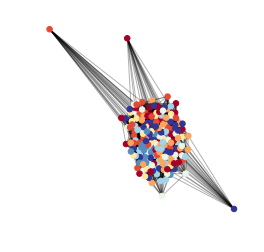

In [131]:
computeCommunity(random_G)

### Discussion

to do


## 6. Count the number the triangles in the graph, and compare to a random graph.

### 6.1 Calculate triangles

In [147]:
triangles = nx.triangles(G)

In [148]:
total = 0
for x in triangles.values():
    total += x

In [149]:
random_triangles = nx.triangles(random_G)

In [150]:
random_total = 0
for x in random_triangles.values():
    random_total += x

In [152]:
print("Triangles in jazz dataset",total/3)
print("Triangles in random network",random_total/3)

Triangles in jazz dataset 17899.0
Triangles in random network 3507.0


### Discussion

As expected, we have more triangles in our dataset because it is likely that in a social network, let's say Facebook, our friends are likely to be friends with themselfs.

## 7. Compute and discuss other centrality measures: betweenness, PageRank

### 7.1 Comparison of betweenness

Betweenness Centrality is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node. 

In [153]:
egde_between_cent = nx.edge_betweenness_centrality(G)

In [154]:
between_cent = nx.betweenness_centrality(G)

In [155]:
random_egde_between_cent = nx.edge_betweenness_centrality(random_G)

In [156]:
random_between_cent = nx.betweenness_centrality(random_G)

In [186]:
def most_important(G):
 """ returns a copy of G with
     the most important nodes
     according to the pagerank """ 
 ranking = nx.betweenness_centrality(G).items()
 r = [x[1] for x in ranking]
 m = sum(r)/len(r) # mean centrality
 t = m*3 # threshold, we keep only the nodes with 3 times the mean
 Gt = G.copy()
 for k, v in ranking:
  if v < t:
   Gt.remove_node(k)
 return Gt

def drawBetweenness(G):
    Gt = most_important(G) # trimming
    # create the layout
    pos = nx.spring_layout(G)
    # draw the nodes and the edges (all)
    nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.2,node_size=8)
    nx.draw_networkx_edges(G,pos,alpha=0.1)

    # draw the most important nodes with a different style
    nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
    # also the labels this time
    nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
    plt.show()

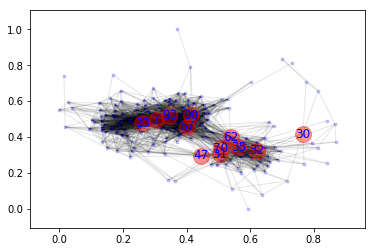

In [187]:
drawBetweenness(G)

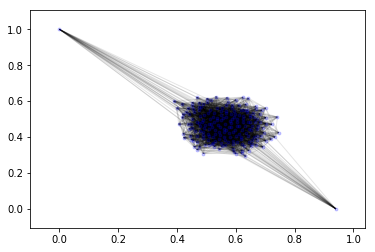

In [188]:
drawBetweenness(random_G)

### Discussion

In our jazz dataset we have some nodes whose mean centrality is 3 times higher than the other nodes. We expected to have these because we said that we have some "hubs" (extremly well connected nodes), so these hubs are usually in shortest path between two nodes. This is why we see a diffrence between our dataset and random network.

### 7. 2 Comparison of Page Rank

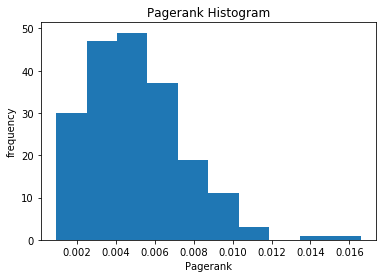

In [99]:
deg_seq = [x for x in nx.pagerank(G).values()]
plt.hist(deg_seq)
plt.title('Pagerank Histogram in jazz dataset')
plt.xlabel('Pagerank')
plt.ylabel('frequency')
plt.show()

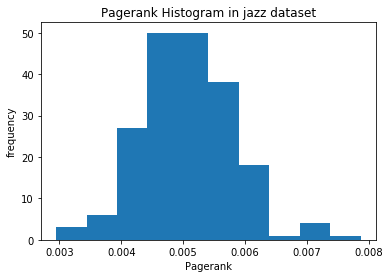

In [100]:
deg_seq = [x for x in nx.pagerank(random_G).values()]
plt.hist(deg_seq)
plt.title('Pagerank Histogram in random dataset')
plt.xlabel('Pagerank')
plt.ylabel('frequency')
plt.show()

### Discussion

PageRank is a way of measuring the importance of website pages. According to Google: PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is.


## 8. Comparison of Clique

In [192]:
clique = nx.algorithms.clique.graph_clique_number(G)
clique

30

In [193]:
random_clique = nx.algorithms.clique.graph_clique_number(random_G)
random_clique

5

### Discussion

In the mathematical area of graph theory, a clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete.

## 9. Find next co-musicians

In [194]:
predictions = nx.algorithms.link_prediction.jaccard_coefficient(G)
#preds = nx.jaccard_coefficient(G, [(0, 1), (2, 3)])
#for u, v, p in predictions:
#    '(%d, %d) -> %.8f' % (u, v, p)

<generator object jaccard_coefficient.<locals>.<genexpr> at 0x7fec1afc42b0>

### Discussion

## Do a comparative analysis of your social dataset and a non-social one (e.g., transport, Web).

In [ ]:
# diameter
# clustering coeeficient
# sparse

## maybe evolution of this dataset

## Conclusion